In [ ]:
import requests
import pandas as pd
import numpy as np

In [ ]:
mov= pd.read_csv('Movies title.csv')

In [ ]:
title_series = mov['Title']

title_array = np.array(title_series)

In [ ]:
print(title_array.shape[0])

99


In [ ]:
api_key = "1ef9b735"
movie_titles = title_array


movie_data_list = []

for movie_title in movie_titles:
    url = "http://www.omdbapi.com/"
    parameters = {
        "apikey": api_key,
        "t": movie_title
    }

    response = requests.get(url, params=parameters)

    if response.status_code == 200:
        data = response.json()
        movie_data_list.append(data)
    else:
        print("Error for", movie_title, ":", response.status_code)

if movie_data_list:
    d = pd.DataFrame(movie_data_list)
#     print(d)
else:
    print("Failed to fetch movie data.")

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         95 non-null     object
 1   Year          95 non-null     object
 2   Rated         95 non-null     object
 3   Released      95 non-null     object
 4   Runtime       95 non-null     object
 5   Genre         95 non-null     object
 6   Director      95 non-null     object
 7   Writer        95 non-null     object
 8   Actors        95 non-null     object
 9   Plot          95 non-null     object
 10  Language      95 non-null     object
 11  Country       95 non-null     object
 12  Awards        95 non-null     object
 13  Poster        95 non-null     object
 14  Ratings       95 non-null     object
 15  Metascore     95 non-null     object
 16  imdbRating    95 non-null     object
 17  imdbVotes     95 non-null     object
 18  imdbID        95 non-null     object
 19  Type      

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
d.head(100)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error,totalSeasons
0,Guardians of the Galaxy,2014,PG-13,01 Aug 2014,121 min,"Action, Adventure, Comedy",James Gunn,"James Gunn, Nicole Perlman, Dan Abnett","Chris Pratt, Vin Diesel, Bradley Cooper",A group of intergalactic criminals must pull t...,English,United States,Nominated for 2 Oscars. 52 wins & 103 nominati...,https://m.media-amazon.com/images/M/MV5BNDIzMT...,"[{'Source': 'Internet Movie Database', 'Value'...",76,8.0,"1,233,785",tt2015381,movie,15 Nov 2015,"$333,718,600",N/A,N/A,True,NaN,NaN
1,Prometheus,2012,R,08 Jun 2012,124 min,"Adventure, Mystery, Sci-Fi",Ridley Scott,"Jon Spaihts, Damon Lindelof, Dan O'Bannon","Noomi Rapace, Logan Marshall-Green, Michael Fa...","Following clues to the origin of mankind, a te...","English, Gaelic","United Kingdom, United States",Nominated for 1 Oscar. 6 wins & 46 nominations...,https://m.media-amazon.com/images/M/MV5BMTY3Nz...,"[{'Source': 'Internet Movie Database', 'Value'...",64,7.0,"626,784",tt1446714,movie,01 Mar 2013,"$126,477,084",N/A,N/A,True,NaN,NaN
2,Split,2016,PG-13,20 Jan 2017,117 min,"Horror, Thriller",M. Night Shyamalan,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",Three girls are kidnapped by a man with a diag...,English,"United States, Japan",10 wins & 26 nominations,https://m.media-amazon.com/images/M/MV5BZTJiNG...,"[{'Source': 'Internet Movie Database', 'Value'...",63,7.3,"526,718",tt4972582,movie,05 Apr 2017,"$138,291,365",N/A,N/A,True,NaN,NaN
3,Sing,2016,PG,21 Dec 2016,108 min,"Animation, Comedy, Family","Garth Jennings, Christophe Lourdelet",Garth Jennings,"Matthew McConaughey, Reese Witherspoon, Seth M...","In a city of humanoid animals, a hustling thea...","English, Japanese","Japan, United States, France",3 wins & 25 nominations,https://m.media-amazon.com/images/M/MV5BMTYzOD...,"[{'Source': 'Internet Movie Database', 'Value'...",59,7.1,"181,456",tt3470600,movie,08 Mar 2017,"$270,578,425",N/A,N/A,True,NaN,NaN
4,Suicide Squad,2016,PG-13,05 Aug 2016,123 min,"Action, Adventure, Fantasy",David Ayer,"David Ayer, John Ostrander","Will Smith, Jared Leto, Margot Robbie",A secret government agency recruits some of th...,"English, Japanese, Spanish",United States,Won 1 Oscar. 18 wins & 41 nominations total,https://m.media-amazon.com/images/M/MV5BMjM1OT...,"[{'Source': 'Internet Movie Database', 'Value'...",40,5.9,"706,414",tt1386697,movie,15 Nov 2016,"$325,100,054",N/A,N/A,True,NaN,NaN
5,The Great Wall,2016,PG-13,17 Feb 2017,103 min,"Action, Adventure, Fantasy",Yimou Zhang,"Carlo Bernard, Doug Miro, Tony Gilroy","Matt Damon, Tian Jing, Willem Dafoe","In ancient China, a group of European mercenar...","English, Mandarin, Spanish","United States, China, Hong Kong, Australia, Ca...",3 wins & 2 nominations,https://m.media-amazon.com/images/M/MV5BMjA3Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",42,5.9,"142,006",tt2034800,movie,09 May 2017,"$45,540,830",N/A,N/A,True,NaN,NaN
6,La La Land,2016,PG-13,25 Dec 2016,128 min,"Comedy, Drama, Music",Damien Chazelle,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt","While navigating their careers in Los Angeles,...","English, Cantonese","United States, Hong Kong",Won 6 Oscars. 240 wins & 295 nominations total,https://m.media-amazon.com/images/M/MV5BMzUzND...,"[{'Source': 'Internet Movie Database', 'Value'...",94,8.0,"626,411",tt3783958,movie,11 Apr 2017,"$151,101,803",N/A,N/A,True,NaN,NaN
7,Mindhorn,2016,TV-MA,05 May 2017,89 min,"Comedy, Thriller",Sean Foley,"Julian Barratt, Simon Farnaby","Julian Barratt, Simon Farnaby, Essie Davis",A has-been actor best known for playing the ti...,English,United Kingdom,1 win & 2 nominations,https://m.media-amazon.com/images/M/MV5BMTU1ND...,"[{'Source': 'Internet Movie Database', 'Value'...",70,6.3,"13,547",tt4799064,movie,12 May 2017,N/A,N/A,N/A,True,NaN,NaN
8,Th

In [ ]:
d.isna().sum()

Title            4
Year             4
Rated            4
Released         4
Runtime          4
Genre            4
Director         4
Writer           4
Actors           4
Plot             4
Language         4
Country          4
Awards           4
Poster           4
Ratings          4
Metascore        4
imdbRating       4
imdbVotes        4
imdbID           4
Type             4
DVD              5
BoxOffice        5
Production       5
Website          5
Response         0
Error           95
totalSeasons    98
dtype: int64

In [ ]:
columns_to_drop = ['Poster','DVD','Type','Awards','Ratings','Response','Website','Production','Error','totalSeasons']
df =d.drop(columns=columns_to_drop)

In [ ]:
df.isna().sum()

Title         4
Year          4
Rated         4
Released      4
Runtime       4
Genre         4
Director      4
Writer        4
Actors        4
Plot          4
Language      4
Country       4
Metascore     4
imdbRating    4
imdbVotes     4
imdbID        4
BoxOffice     5
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape[0]

94

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 98
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       94 non-null     object
 1   Year        94 non-null     object
 2   Rated       94 non-null     object
 3   Released    94 non-null     object
 4   Runtime     94 non-null     object
 5   Genre       94 non-null     object
 6   Director    94 non-null     object
 7   Writer      94 non-null     object
 8   Actors      94 non-null     object
 9   Plot        94 non-null     object
 10  Language    94 non-null     object
 11  Country     94 non-null     object
 12  Metascore   94 non-null     object
 13  imdbRating  94 non-null     object
 14  imdbVotes   94 non-null     object
 15  imdbID      94 non-null     object
 16  BoxOffice   94 non-null     object
dtypes: object(17)
memory usage: 13.2+ KB


In [ ]:
df.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Metascore,imdbRating,imdbVotes,imdbID,BoxOffice
0,Guardians of the Galaxy,2014,PG-13,01 Aug 2014,121 min,"Action, Adventure, Comedy",James Gunn,"James Gunn, Nicole Perlman, Dan Abnett","Chris Pratt, Vin Diesel, Bradley Cooper",A group of intergalactic criminals must pull t...,English,United States,76,8.0,"1,233,785",tt2015381,"$333,718,600"
1,Prometheus,2012,R,08 Jun 2012,124 min,"Adventure, Mystery, Sci-Fi",Ridley Scott,"Jon Spaihts, Damon Lindelof, Dan O'Bannon","Noomi Rapace, Logan Marshall-Green, Michael Fa...","Following clues to the origin of mankind, a te...","English, Gaelic","United Kingdom, United States",64,7.0,"626,784",tt1446714,"$126,477,084"
2,Split,2016,PG-13,20 Jan 2017,117 min,"Horror, Thriller",M. Night Shyamalan,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",Three girls are kidnapped by a man with a diag...,English,"United States, Japan",63,7.3,"526,718",tt4972582,"$138,291,365"
3,Sing,2016,PG,21 Dec 2016,108 min,"Animation, Comedy, Family","Garth Jennings, Christophe Lourdelet",Garth Jennings,"Matthew McConaughey, Reese Witherspoon, Seth M...","In a city of humanoid animals, a hustling thea...","English, Japanese","Japan, United States, France",59,7.1,"181,456",tt3470600,"$270,578,425"
4,Suicide Squad,2016,PG-13,05 Aug 2016,123 min,"Action, Adventure, Fantasy",David Ayer,"David Ayer, John Ostrander","Will Smith, Jared Leto, Margot Robbie",A secret government agency recruits some of th...,"English, Japanese, Spanish",United States,40,5.9,"706,414",tt1386697,"$325,100,054"


In [ ]:
############################################  PHASE 2 ####################################################

In [ ]:
# NOTE: in phase 1 we dropped the nulls and the un wanted columns

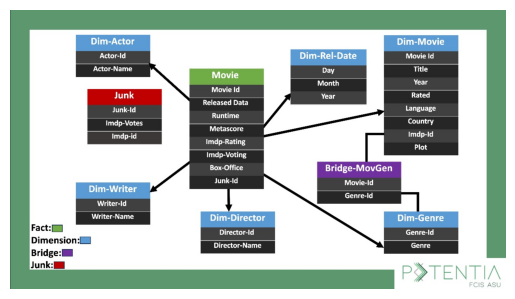

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread("schema 1.jpeg")

plt.imshow(image)
plt.axis('off')
plt.show()

################################################ PHASE 1 SCHEMA #####################################################

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 98
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       94 non-null     object
 1   Year        94 non-null     object
 2   Rated       94 non-null     object
 3   Released    94 non-null     object
 4   Runtime     94 non-null     object
 5   Genre       94 non-null     object
 6   Director    94 non-null     object
 7   Writer      94 non-null     object
 8   Actors      94 non-null     object
 9   Plot        94 non-null     object
 10  Language    94 non-null     object
 11  Country     94 non-null     object
 12  Metascore   94 non-null     object
 13  imdbRating  94 non-null     object
 14  imdbVotes   94 non-null     object
 15  imdbID      94 non-null     object
 16  BoxOffice   94 non-null     object
dtypes: object(17)
memory usage: 13.2+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 98
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       94 non-null     object
 1   Year        94 non-null     object
 2   Rated       94 non-null     object
 3   Released    94 non-null     object
 4   Runtime     94 non-null     object
 5   Genre       94 non-null     object
 6   Director    94 non-null     object
 7   Writer      94 non-null     object
 8   Actors      94 non-null     object
 9   Plot        94 non-null     object
 10  Language    94 non-null     object
 11  Country     94 non-null     object
 12  Metascore   94 non-null     object
 13  imdbRating  94 non-null     object
 14  imdbVotes   94 non-null     object
 15  imdbID      94 non-null     object
 16  BoxOffice   94 non-null     object
dtypes: object(17)
memory usage: 13.2+ KB


In [ ]:
df['Released'] = pd.to_datetime(df['Released'])
df['DAY']=df['Released'].dt.day
df['MONTH']=df['Released'].dt.month
df['YEAR']=df['Released'].dt.year
df.drop('Released',axis=1,inplace=True)

In [ ]:
df

,Title,Year,Rated,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Metascore,imdbRating,imdbVotes,imdbID,BoxOffice,DAY,MONTH,YEAR
0,Guardians of the Galaxy,2014,PG-13,121 min,"Action, Adventure, Comedy",James Gunn,"James Gunn, Nicole Perlman, Dan Abnett","Chris Pratt, Vin Diesel, Bradley Cooper",A group of intergalactic criminals must pull t...,English,United States,76,8.0,"1,233,785",tt2015381,"$333,718,600",1,8,2014
1,Prometheus,2012,R,124 min,"Adventure, Mystery, Sci-Fi",Ridley Scott,"Jon Spaihts, Damon Lindelof, Dan O'Bannon","Noomi Rapace, Logan Marshall-Green, Michael Fa...","Following clues to the origin of mankind, a te...","English, Gaelic","United Kingdom, United States",64,7.0,"626,784",tt1446714,"$126,477,084",8,6,2012
2,Split,2016,PG-13,117 min,"Horror, Thriller",M. Night Shyamalan,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",Three girls are kidnapped by a man with a diag...,English,"United States, Japan",63,7.3,"526,718",tt4972582,"$138,291,365",20,1,2017
3,Sing,2016,PG,108 min,"Animation, Comedy, Family","Garth Jennings, Christophe Lourdelet",Garth Jennings,"Matthew McConaughey, Reese Witherspoon, Seth M...","In a city of humanoid animals, a hustling thea...","English, Japanese","Japan, United States, France",59,7.1,"181,456",tt3470600,"$270,578,425",21,12,2016
4,Suicide Squad,2016,PG-13,123 min,"Action, Adventure, Fantasy",David Ayer,"David Ayer, John Ostrander","Will Smith, Jared Leto, Margot Robbie",A secret government agency recruits some of th...,"English, Japanese, Spanish",United States,40,5.9,"706,414",tt1386697,"$325,100,054",5,8,2016
5,The Great Wall,2016,PG-13,103 min,"Action, Adventure, Fantasy",Yimou Zhang,"Carlo Bernard, Doug Miro, Tony Gilroy","Matt Damon, Tian Jing, Willem Dafoe","In ancient China, a group of European mercenar...","English, Mandarin, Spanish","United States, China, Hong Kong, Australia, Ca...",42,5.9,"142,006",tt2034800,"$45,540,830",17,2,2017
6,La La Land,2016,PG-13,128 min,"Comedy, Drama, Music",Damien Chazelle,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt","While navigating their careers in Los Angeles,...","English, Cantonese","United States, Hong Kong",94,8.0,"626,411",tt3783958,"$151,101,803",25,12,2016
7,Mindhorn,2016,TV-MA,89 min,"Comedy, Thriller",Sean Foley,"Julian Barratt, Simon Farnaby","Julian Barratt, Simon Farnaby, Essie Davis",A has-been actor best known for playing the ti...,English,United Kingdom,70,6.3,"13,547",tt4799064,N/A,5,5,2017
8,The Lost City of Z,2016,PG-13,141 min,"Adventure, Biography, Drama",James Gray,"James Gray, David Grann","Charlie Hunnam, Robert Pattinson, Sienna Miller","A true-life drama, centering on British explor...","English, Portuguese, Tupi, Spanish, German",United States,78,6.6,"96,107",tt1212428,"$8,580,410",21,4,2017
9,Passengers,2016,PG-13,116 min,"Drama, Romance, Sci-Fi",Morten Tyldum,Jon Spaihts,"Jennifer Lawrence, Chris Pratt, Michael Sheen",A malfunction in a sleeping pod on a spacecraf...,"English, Spanish, Japanese, French","United States, Australia",41,7.0,"426,430",tt1355644,"$100,014,699",21,12,2016


In [ ]:
df['BoxOffice'] = df['BoxOffice'].replace('N/A', '').str.replace('$', '').str.replace(',', '')

# Convert the values to numeric, ignoring errors
df['BoxOffice'] = pd.to_numeric(df['BoxOffice'], errors='coerce')


<ipython-input-295-4bf0cc9885fe>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['BoxOffice'] = df['BoxOffice'].replace('N/A', '').str.replace('$', '').str.replace(',', '')


In [ ]:
df['Metascore'] = df['Metascore'].replace('N/A', '').str.replace('$', '').str.replace(',', '')

# Convert the values to numeric, ignoring errors
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')

<ipython-input-296-1501d58f25f1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Metascore'] = df['Metascore'].replace('N/A', '').str.replace('$', '').str.replace(',', '')


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isna().sum()

Title         0
Year          0
Rated         0
Runtime       0
Genre         0
Director      0
Writer        0
Actors        0
Plot          0
Language      0
Country       0
Metascore     0
imdbRating    0
imdbVotes     0
imdbID        0
BoxOffice     0
DAY           0
MONTH         0
YEAR          0
dtype: int64

In [ ]:
df.drop('Year',axis=1,inplace=True)

In [ ]:
df.head()

,Title,Rated,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Metascore,imdbRating,imdbVotes,imdbID,BoxOffice,DAY,MONTH,YEAR
0,Guardians of the Galaxy,PG-13,121 min,"Action, Adventure, Comedy",James Gunn,"James Gunn, Nicole Perlman, Dan Abnett","Chris Pratt, Vin Diesel, Bradley Cooper",A group of intergalactic criminals must pull t...,English,United States,76.0,8.0,"1,233,785",tt2015381,333718600.0,1,8,2014
1,Prometheus,R,124 min,"Adventure, Mystery, Sci-Fi",Ridley Scott,"Jon Spaihts, Damon Lindelof, Dan O'Bannon","Noomi Rapace, Logan Marshall-Green, Michael Fa...","Following clues to the origin of mankind, a te...","English, Gaelic","United Kingdom, United States",64.0,7.0,"626,784",tt1446714,126477084.0,8,6,2012
2,Split,PG-13,117 min,"Horror, Thriller",M. Night Shyamalan,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",Three girls are kidnapped by a man with a diag...,English,"United States, Japan",63.0,7.3,"526,718",tt4972582,138291365.0,20,1,2017
3,Sing,PG,108 min,"Animation, Comedy, Family","Garth Jennings, Christophe Lourdelet",Garth Jennings,"Matthew McConaughey, Reese Witherspoon, Seth M...","In a city of humanoid animals, a hustling thea...","English, Japanese","Japan, United States, France",59.0,7.1,"181,456",tt3470600,270578425.0,21,12,2016
4,Suicide Squad,PG-13,123 min,"Action, Adventure, Fantasy",David Ayer,"David Ayer, John Ostrander","Will Smith, Jared Leto, Margot Robbie",A secret government agency recruits some of th...,"English, Japanese, Spanish",United States,40.0,5.9,"706,414",tt1386697,325100054.0,5,8,2016


In [ ]:
selected_columns = ['Runtime', 'Metascore', 'imdbRating', 'imdbVotes', 'BoxOffice', 'DAY', 'MONTH', 'YEAR']

Movie = df[selected_columns]

Movie['movieID'] = df.index

Movie = Movie[['movieID'] + selected_columns]

<ipython-input-301-dd83241385a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie['movieID'] = df.index


In [ ]:
df.isna().sum()

Title         0
Rated         0
Runtime       0
Genre         0
Director      0
Writer        0
Actors        0
Plot          0
Language      0
Country       0
Metascore     0
imdbRating    0
imdbVotes     0
imdbID        0
BoxOffice     0
DAY           0
MONTH         0
YEAR          0
dtype: int64

In [ ]:
Movie.head()

,movieID,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,DAY,MONTH,YEAR
0,0,121 min,76.0,8.0,"1,233,785",333718600.0,1,8,2014
1,1,124 min,64.0,7.0,"626,784",126477084.0,8,6,2012
2,2,117 min,63.0,7.3,"526,718",138291365.0,20,1,2017
3,3,108 min,59.0,7.1,"181,456",270578425.0,21,12,2016
4,4,123 min,40.0,5.9,"706,414",325100054.0,5,8,2016


In [ ]:
Movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 98
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movieID     88 non-null     int64  
 1   Runtime     88 non-null     object 
 2   Metascore   88 non-null     float64
 3   imdbRating  88 non-null     object 
 4   imdbVotes   88 non-null     object 
 5   BoxOffice   88 non-null     float64
 6   DAY         88 non-null     int64  
 7   MONTH       88 non-null     int64  
 8   YEAR        88 non-null     int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 6.9+ KB


In [ ]:
Movie.to_csv('Movie.csv')

In [ ]:
temp = pd.DataFrame()
temp['Actor_Array'] = df['Actors'].apply(lambda x: x.split(', '))
temp
flattened_data = []
for actors_list in temp['Actor_Array']:
    flattened_data.extend(actors_list)

flattened_df = pd.DataFrame({'Actor_Name': flattened_data})

In [ ]:
flattened_df.head()

,Actor_Name
0,Chris Pratt
1,Vin Diesel
2,Bradley Cooper
3,Noomi Rapace
4,Logan Marshall-Green


In [ ]:
unique_actors = flattened_df['Actor_Name'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
t= pd.DataFrame()
t['Encoded_Actor'] = label_encoder.fit_transform(flattened_df['Actor_Name'])

In [ ]:
DimActor= pd.DataFrame()

In [ ]:
DimActor["Actor_ID"]=flattened_df["Actor_Name"]

In [ ]:
DimActor["Actors"]=flattened_df["Actor_Name"]
DimActor.head()

,Actor_ID,Actors
0,Chris Pratt,Chris Pratt
1,Vin Diesel,Vin Diesel
2,Bradley Cooper,Bradley Cooper
3,Noomi Rapace,Noomi Rapace
4,Logan Marshall-Green,Logan Marshall-Green


In [ ]:
mapping_dict = dict(zip(DimActor['Actors'],t['Encoded_Actor']))

DimActor['Actor_ID'] = DimActor['Actor_ID'].map(mapping_dict)

In [ ]:
DimActor.to_csv('DimActor.csv')

In [ ]:
temp = pd.DataFrame()
temp['Actor_Array'] = df['Writer'].apply(lambda x: x.split(', '))
temp
flattened_data = []
for actors_list in temp['Actor_Array']:
    flattened_data.extend(actors_list)

flattened_df = pd.DataFrame({'Writer_Name': flattened_data})


In [ ]:
unique = flattened_df['Writer_Name'].unique()

In [ ]:
label_encoder = LabelEncoder()
t= pd.DataFrame()
t['Encoded'] = label_encoder.fit_transform(flattened_df['Writer_Name'])

In [ ]:
DimWriter= pd.DataFrame()

In [ ]:
DimWriter["Writer_ID"]=flattened_df["Writer_Name"]

In [ ]:
DimWriter["Writer"]=flattened_df["Writer_Name"]
DimWriter.head()

,Writer_ID,Writer
0,James Gunn,James Gunn
1,Nicole Perlman,Nicole Perlman
2,Dan Abnett,Dan Abnett
3,Jon Spaihts,Jon Spaihts
4,Damon Lindelof,Damon Lindelof


In [ ]:
mapping_dict = dict(zip(DimWriter['Writer'],t['Encoded']))

DimWriter['Writer_ID'] = DimWriter['Writer_ID'].map(mapping_dict)

In [ ]:
DimWriter.to_csv('DimWriter.csv')

In [ ]:
temp = pd.DataFrame()
temp['Director'] = df['Director'].apply(lambda x: x.split(', '))
temp
flattened_data = []
for actors_list in temp['Director']:
    flattened_data.extend(actors_list)

flattened_df = pd.DataFrame({'Director_Name': flattened_data})


In [ ]:
unique = flattened_df['Director_Name'].unique()

In [ ]:
label_encoder = LabelEncoder()
t= pd.DataFrame()
t['Encoded'] = label_encoder.fit_transform(flattened_df['Director_Name'])

In [ ]:
DimDirector= pd.DataFrame()

In [ ]:
DimDirector["Director_ID"]=flattened_df["Director_Name"]

In [ ]:
DimDirector["Director"]=flattened_df["Director_Name"]

In [ ]:
mapping_dict = dict(zip(DimDirector['Director'],t['Encoded']))

DimDirector['Director_ID'] = DimDirector['Director_ID'].map(mapping_dict)

In [ ]:
DimDirector.to_csv('DimDirector.csv')

In [ ]:
DimDate= pd.DataFrame()
DimDate=Movie[['DAY','MONTH','YEAR']]

DimDate.head()

,DAY,MONTH,YEAR
0,1,8,2014
1,8,6,2012
2,20,1,2017
3,21,12,2016
4,5,8,2016


In [ ]:
DimDate.to_csv('DimDate.csv')

In [ ]:
DimMovie=pd.DataFrame()
selected_columns = ['Title', 'YEAR', 'Rated', 'Plot']

DimMovie = df[selected_columns]

DimMovie['movieID'] = DimMovie.index

DimMovie = DimMovie[['movieID'] + selected_columns]


<ipython-input-333-df125c3c9634>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DimMovie['movieID'] = DimMovie.index


In [ ]:
DimMovie.to_csv('DimMovie.csv')

In [ ]:
temp = pd.DataFrame()
temp['genre_Array'] = df['Genre'].apply(lambda x: x.split(', '))
temp
flattened_data = []
for actors_list in temp['genre_Array']:
    flattened_data.extend(actors_list)

flattened_df = pd.DataFrame({'Genre_Name': flattened_data})


In [ ]:
unique = flattened_df['Genre_Name'].unique()

In [ ]:
label_encoder = LabelEncoder()
t= pd.DataFrame()
t['Encoded'] = label_encoder.fit_transform(flattened_df['Genre_Name'])

In [ ]:
DimGenre= pd.DataFrame()

In [ ]:
DimGenre["Genre_ID"]=flattened_df["Genre_Name"]

In [ ]:
DimGenre["Genre"]=flattened_df["Genre_Name"]

In [ ]:
mapping_dict = dict(zip(DimGenre['Genre'],t['Encoded']))

DimGenre['Genre_ID'] = DimGenre['Genre_ID'].map(mapping_dict)

In [ ]:
DimGenre.to_csv('DimGenre.csv')

In [ ]:
Bridge_MovGenre = pd.DataFrame()
Bridge_MovGenre['movieID']=Movie['movieID']

In [ ]:
Bridge_MovGenre['Genre_ID']=DimGenre['Genre_ID']

In [ ]:
Bridge_MovGenre.to_csv('Bridge_MovGenre.csv')

In [ ]:
temp = pd.DataFrame()
temp['Language_Array'] = df['Language'].apply(lambda x: x.split(', '))
temp
flattened_data = []
for actors_list in temp['Language_Array']:
    flattened_data.extend(actors_list)

flattened_df = pd.DataFrame({'Language_Name': flattened_data})
unique = flattened_df['Language_Name'].unique()

In [ ]:
label_encoder = LabelEncoder()
t= pd.DataFrame()
t['Encoded'] = label_encoder.fit_transform(flattened_df['Language_Name'])

In [ ]:
DimLanguage= pd.DataFrame()

In [ ]:
DimLanguage["Language_ID"]=flattened_df["Language_Name"]

In [ ]:
DimLanguage["Language"]=flattened_df["Language_Name"]

In [ ]:
mapping_dict = dict(zip(DimLanguage['Language'],t['Encoded']))

DimLanguage['Language_ID'] = DimLanguage['Language_ID'].map(mapping_dict)

In [ ]:
DimLanguage.to_csv('DimLanguage.csv')

In [ ]:
Bridge_MovLanguage = pd.DataFrame()
Bridge_MovLanguage['movieID']=Movie['movieID']

In [ ]:
Bridge_MovLanguage['Language_ID']=DimLanguage['Language_ID']

In [ ]:
Bridge_MovLanguage.to_csv('Bridge_MovLanguage.csv')

In [ ]:
temp = pd.DataFrame()
temp['country_Array'] = df['Country'].apply(lambda x: x.split(', '))
temp
flattened_data = []
for actors_list in temp['country_Array']:
    flattened_data.extend(actors_list)

flattened_df = pd.DataFrame({'Country_Name': flattened_data})
unique = flattened_df['Country_Name'].unique()

In [ ]:
label_encoder = LabelEncoder()
t= pd.DataFrame()
t['Encoded'] = label_encoder.fit_transform(flattened_df['Country_Name'])

In [ ]:
DimCountry= pd.DataFrame()

In [ ]:
DimCountry["Country_ID"]=flattened_df["Country_Name"]

In [ ]:
DimCountry["Country"]=flattened_df["Country_Name"]

In [ ]:
mapping_dict = dict(zip(DimCountry['Country'],t['Encoded']))

DimCountry['Country_ID'] = DimCountry['Country_ID'].map(mapping_dict)

In [ ]:
DimCountry.to_csv('DimCountry.csv')

In [ ]:
Bridge_MovCountry = pd.DataFrame()
Bridge_MovCountry['movieID']=Movie['movieID']

In [ ]:
Bridge_MovCountry['Country_ID']=DimCountry['Country_ID']

In [ ]:
Bridge_MovCountry.to_csv('Bridge_MovCountry.csv')